In [2]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
from numbers import Number
import numpy as np
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

sampleLines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if line[3].find('steering') == -1:
            sampleLines.append(line)

In [3]:
training_samples, validation_samples = train_test_split(sampleLines, test_size=0.2)

print("{} Training Samples".format(len(training_samples)))
print("{} Validation Samples".format(len(validation_samples)))

12684 Training Samples
3172 Validation Samples


In [32]:
# Pull out random data lines
def sampleData(n, samples):    
    images = []
    angles = []
    correction = [0, 0.15, -0.15]
    for i in range(n):
        iRandom = random.randint(0, len(samples))
        sample = samples[iRandom]
    
        for camera in range(3):
            name = 'data/IMG/'+sample[camera].split('/')[-1]
            bgr = cv2.imread(name)
            rgb = bgr[...,::-1]
            angle = float(sample[3]) + correction[camera]
            images.append(rgb)
            angles.append(angle)

            flipped_image = cv2.flip(rgb, 1)
            flipped_angle = -angle
            images.append(flipped_image)
            angles.append(flipped_angle)

    X = np.array(images)
    y = np.array(angles)
    return X, y

def subplotImages(n, X, y):
    fig, axes = plt.subplots(nrows=n, ncols=4, figsize=(16,8))
    fig.subplots_adjust(hspace=0.6)
    names = ['Left','Center','Right','L Flip']
    for r in range(n):
        offset = [2,0,4,3]
        camera = 6*r
        for c in range(4):
            axes[r,c].imshow(X[camera+offset[c]])
            axes[r,c].set_title("{} {:.2f}".format(
                names[c], y[camera+offset[c]]))
            axes[r,c].xaxis.set_visible(False)
            axes[r,c].yaxis.set_visible(False)
    plt.tight_layout()
    plt.show()

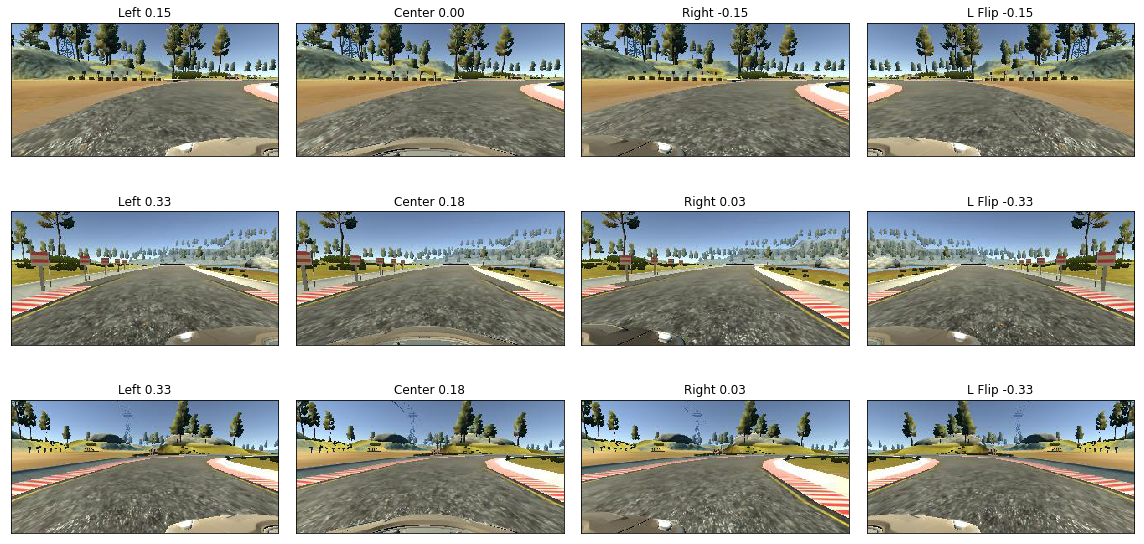

In [33]:
n = 3
X_train, y_train = sampleData(n, training_samples)
subplotImages(n, X_train, y_train)

